# Lezione 09

## Dario Pullia

Ci proponiamo di implementare un algoritmo genetico per risolvere il **Traveling Salesman Problem (TSP
)**.
Il TSP richiede di trovare il percorso minimo che passa per N città una sola volta. 


Approcciare in modo *brute-force* il problema è impensabile poichè per N città esistono N! combinazioni, pertanto scegliamo di affrontare il problema con un **algoritmo genetico**.
Gli algoritmi genetici alla radice provano ad imitare la *selezione naturale* (l'analogia funziona particolarmente bene con organismi monocellulari), introducendo una popolazione che viene messa alla prova e che si riproduce secondo la legge del più adatto, introducendo delle mutazioni randomiche ad ogni cambio generazionale. L'analogia che userò io però parla di **percorsi** e **città**. Ogni percorso è un cromosoma e le città sono i geni. 



Scegliamo di minimizzare il percorso tra 34 città su una circonferenza e 34 città in posizioni casuali all'interno di un quadrato. Scelgiamo come *cost function*
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

Il processo inizia da una popolazione completamente casuale mentre poi ad ogni gerazione viene creata a una nuova popolazione a partire da quella precedente un percorso alla volta. Per ognuno di questi si estrae il j-esimo percorso della generazione precedente con $j= int(M \times r^p)+1$ dove $r \in [0,1)$ è un numero estratto casualmente e p è un parametro arbitrario (nel nostro caso si è visto che p=2.5 funziona bene). Il percorso estratto quindi può subire una di queste mutazioni:
- Shift: Può avvenire una traslazione di una o più città di uno o più posizioni.
- Swap: Due gruppi da una o più città possono scambiarsi di posizione.
- Invert: Un gruppo di città può invertire l'ordine in cui viene visitato.
- Crossover: Un percorso può ereditare da un **percorso buono** ($j= int(M \times r^p)+1$) una sezione di percorso.
- Random: Lasciamo che un percorso si resetti completamente ad uno stadio casuale.



#### Implementazione

Il processo di ottimizzazione, soprattutto per N grandi, per sua natura è lungo. Al fine di ottimizzare il processo di mutazione, ho modellizzato ogni cromosoma (o **percorso**) in una **stuttura dati** chiamata **lista doppiamente collegata**.

In particolare ho creato 3 classi, una classe **Town** che viene usata dalla classe **Path** che a sua volta è usata nella classe **Manager**.

La classe **Manager** è quella che ha il compito di gestire ogni processo della catena evolutiva. Al suo interno crea e contiene tutti i **paths** e su di essi può compiere tutta una serie di azioni tra cui **far sì che ognuno si valuti**, **eseguire mutazioni** e **salvare**.

Ogni oggetto di tipo **Path** contiene la sua lunghezza, un oggetto di tipo **puntatore a Town** e la sua dimensione. Ogni percorso è capace, tra le altre cose, di **misurarsi** e di **mutarsi** (di più dopo).

Infine gli oggetti di tipo **Town** contengono le coordinate della città, un ID e due puntatori a Town **Next** e **Previous**. Questi oggetti contengono principalmente metodi utili a **modificare** e **leggere** i suoi contenuti. 




**L'idea** è che ogni città del percorso contiene il collegamento con la città precedente e con la successiva. Questo efficienta molto (soprattutto per percorsi lunghi) il processo di mutazione poichè rende facilmente trasferibili interi gruppi di città, ad esempio per uno *shift* di qualsiasi lunghezza è sufficiente modificare 6 puntatori a Town. Di fatto si rende una operazione di **O(N)**, nel caso suggerito di una struttura dati **vector** in cui la modifica avviene tramite copia e incolla di elementi usando vettori di appoggio, in una operazione **O(1)**!





Un altro algoritmo che ritengo da sottolineare è quello utilizzato per **creare i percorsi casuali**:
Piuttosto che estrarre casualmente la città data la posizione (e quindi dover controllare ogni volta tutto il percorso che questa non fosse già stata estratta) ho scelto di estrarre la posizione in ordine di città dopo aver inizializzato un vettore 'ordine' a 0. Questo permette di controllare solo che $ordine[i_{random}]\neq 0$ per essere sicuro che la l'inserimento sia corretto.





### Esercizio 09.1

Proviamo ad evolvere il sistema prima di introdurre il crossover. 
Creiamo 500 percorsi ed evolviamo 500 generazioni. Ogni mutazione ha probabilità $P_{Mutazione}=25\%$ e si ha un $P_{random}=5\%$ di rimescolamento casuale.

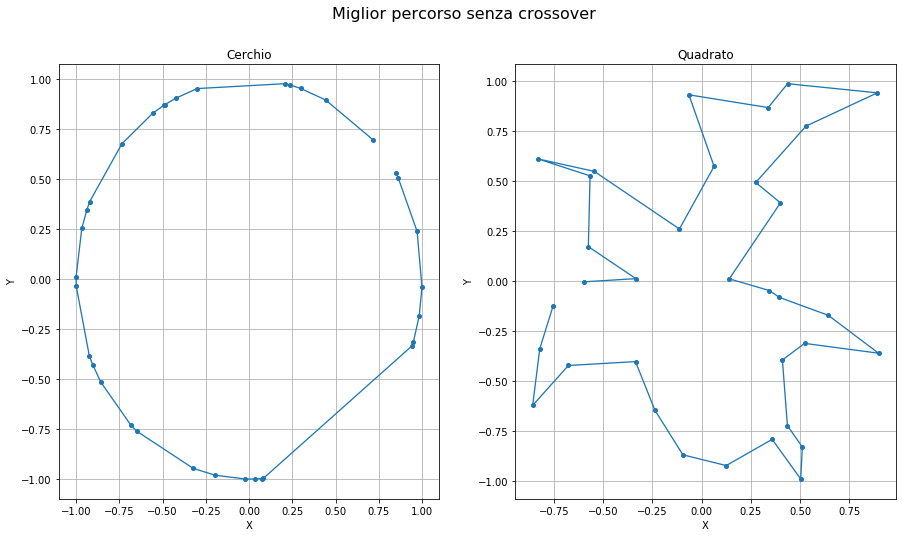

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
import imageio


''' Useful ruler
count=0
    
for i in range(1,X.size):
    count+=(Xord[i]-Xord[i-1])**2+(Yord[i]-Yord[i-1])**2

count+=(Xord[N-1]-Xord[0])**2+(Yord[N-1]-Yord[0])**2

print(count)    
'''    
    

fig, ax= plt.subplots(1, 2,figsize=(15, 8))
fig.suptitle("Miglior percorso senza crossover", fontsize=16)

C=0
X,Y = np.loadtxt("data01/PreCrossover/Circ/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/PreCrossover/Circ/Bests.dat",)
fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

ax[0].plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+"    Len: "+str(Best[M][N]))



X,Y = np.loadtxt("data01/PreCrossover/Square/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/PreCrossover/Square/Bests.dat",)
fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)
M=len(Best)-1

Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])


ax[1].plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+"    Len: "+str(Best[M][N]))


ax[0].set_title('Cerchio')
ax[1].set_title('Quadrato')

ax[0].set_xlabel('X')
ax[1].set_xlabel('X')


ax[0].set_ylabel('Y')
ax[1].set_ylabel('Y')

ax[0].grid(True)
ax[1].grid(True)
plt.show()


Anche senza crossover si ottengono **buoni** risultati.

Ora invece introduciamo il crossover modificando le probabilità in  $P_{Mutazione}=15\%$, $P_{random}=5\%$ e $P_{Crossover}=45\%$.

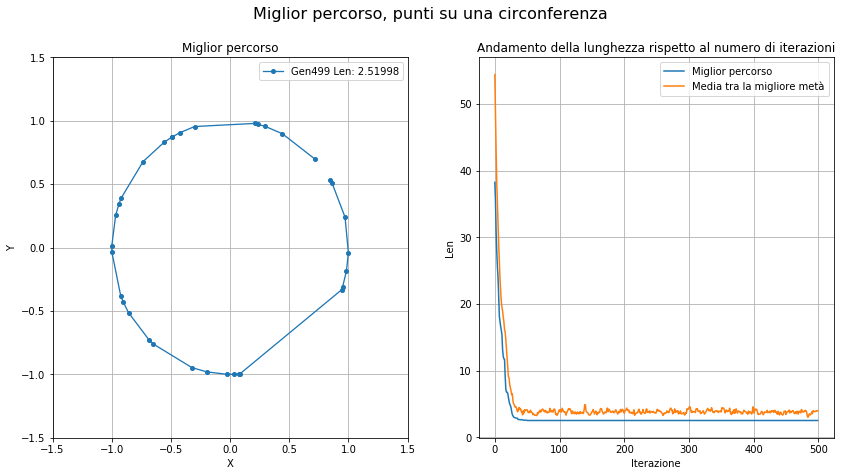

In [42]:
X,Y = np.loadtxt("data01/Circ/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/Circ/Bests.dat",) 
Len, LenAVG = np.loadtxt("data01/Circ/Bests.dat",  usecols=(X.size,X.size+1), delimiter=' ', unpack='true')

filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

    
    

    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 7))
fig.suptitle("Miglior percorso, punti su una circonferenza", fontsize=16)
    
ax1.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+" Len: "+str(Best[M][N]))  
ax1.set_title('Miglior percorso')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlim([-1.5, 1.5])
ax1.grid(True)
ax1.legend()


ax2.plot(np.arange(M+1), Len,label='Miglior percorso')
ax2.plot(np.arange(M+1), LenAVG, label='Media tra la migliore metà')
ax2.set_title('Andamento della lunghezza rispetto al numero di iterazioni')
ax2.set_xlabel('Iterazione')
ax2.set_ylabel('Len')
ax2.grid(True)
ax2.legend()
plt.show()



<img src="data01/figsCirc/movie.gif" width="450" align="center">

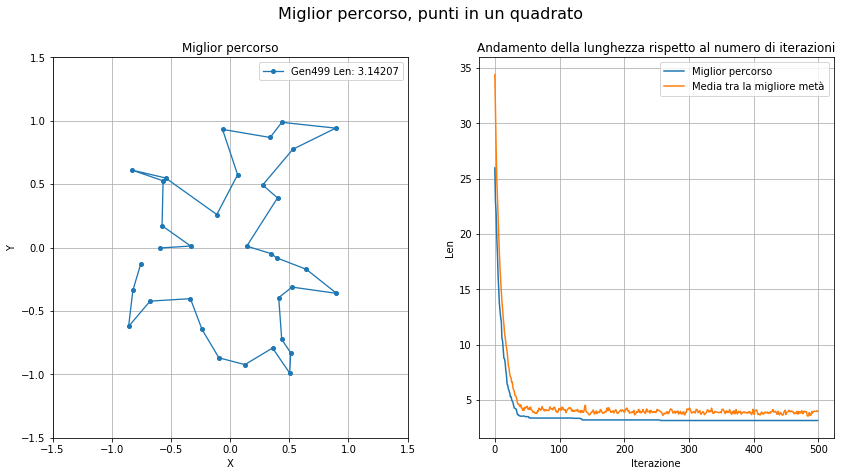

In [43]:
X,Y = np.loadtxt("data01/Square/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/Square/Bests.dat",) 
Len, LenAVG = np.loadtxt("data01/Square/Bests.dat",  usecols=(X.size,X.size+1), delimiter=' ', unpack='true')

filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

    
    

    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 7))
fig.suptitle("Miglior percorso, punti in un quadrato", fontsize=16)
    
ax1.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+" Len: "+str(Best[M][N]))  
ax1.set_title('Miglior percorso')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlim([-1.5, 1.5])
ax1.grid(True)
ax1.legend()


ax2.plot(np.arange(M+1), Len,label='Miglior percorso')
ax2.plot(np.arange(M+1), LenAVG, label='Media tra la migliore metà')
ax2.set_title('Andamento della lunghezza rispetto al numero di iterazioni')
ax2.set_xlabel('Iterazione')
ax2.set_ylabel('Len')
ax2.grid(True)
ax2.legend()
plt.show()



<img src="data01/figsSquare/movie.gif" width="450" align="center">

Osserviamo una rapida convergenza in tutti i casi. 
Notiamo dalla media sulla miglior metà di popolazione che il sistema mantiene una certa esplorazione, ovvero non si fossilizza sul minimo in cui si trova ma compie delle mutazioni cercando di migliorarsi.

Non possiamo sapere se quella trovata sia veramente la **migliore** soluzione, possiamo affermare che però con pochissime operazioni abbiamo trovato una **buona** soluzione.